In [19]:
"""
consider a scenario where you'd like to use this data to plan a weekend camping trip.
Instead of relying on crowd-sourced reviews online, you decide to create your own map. 
This way, you can tailor the trip to your specific interests.
"""
print("First Map")

First Map


In [72]:
import geopandas as gpd
import os
import matplotlib

In [56]:
# Relative path to shapefile from the current working directory
file_path = "Data/DEC_lands/DEC_lands.shp"

# Read in the data
full_data = gpd.read_file(file_path)

# View the first five rows of the data
full_data.head(5)

,OBJECTID,CATEGORY,UNIT,FACILITY,CLASS,UMP,DESCRIPTIO,REGION,COUNTY,URL,SOURCE,UPDATE_,OFFICE,ACRES,LANDS_UID,GREENCERT,SHAPE_AREA,SHAPE_LEN,geometry
0,1,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,738.620192,103,N,2.990365e+06,7927.662385,"POLYGON ((486093.245 4635308.586, 486787.235 4..."
1,2,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,282.553140,1218,N,1.143940e+06,4776.375600,"POLYGON ((491931.514 4637416.256, 491305.424 4..."
2,3,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,234.291262,1780,N,9.485476e+05,5783.070364,"POLYGON ((486000.287 4635834.453, 485007.55 46..."
3,4,FOR PRES DET PAR,CFP,GREENE COUNTY FP DETACHED PARCEL,WILD FOREST,None,None,4,GREENE,http://www.dec.ny.gov/,GREENE RPP,5/12,STAMFORD,450.106464,2060,N,1.822293e+06,7021.644833,"POLYGON ((541716.775 4675243.268, 541217.58 46..."
4,6,FOREST PRESERVE,AFP,SARANAC LAKES WILD FOREST,WILD FOREST,SARANAC LAKES,None,5,ESSEX,http://www.dec.ny.gov/lands/22593.html,"DECRP, ESSEX RPP",12/96,RAY BROOK,69.702387,1517,N,2.821959e+05,2663.909932,"POLYGON ((583896.043 4909643.187, 583891.2 490..."


In [20]:
# to show every command that can be used with a DataFrame will work with the data!
# type(full_data)

geopandas.geodataframe.GeoDataFrame

In [26]:
# we can select a subset of all colums
data = full_data.loc[:, ["CLASS", "COUNTY", "geometry"]].copy()
# print(data)

In [27]:
# value_counts() method to see a list of different types,
# How many lands of each type are there?
data.CLASS.value_counts()

CLASS
WILD FOREST                   965
INTENSIVE USE                 108
PRIMITIVE                      60
WILDERNESS                     52
ADMINISTRATIVE                 17
UNCLASSIFIED                    7
HISTORIC                        5
PRIMITIVE BICYCLE CORRIDOR      4
CANOE AREA                      1
Name: count, dtype: int64

In [28]:
# can also use loc (and iloc) and isin to select subsets of the data.
# Select lands that fall under the "WILD FOREST" or "WILDERNESS" category
wild_lands = data.loc[data.CLASS.isin(['WILD FOREST', 'WILDERNESS'])].copy()
wild_lands.head()

,CLASS,COUNTY,geometry
0,WILD FOREST,DELAWARE,"POLYGON ((486093.245 4635308.586, 486787.235 4..."
1,WILD FOREST,DELAWARE,"POLYGON ((491931.514 4637416.256, 491305.424 4..."
2,WILD FOREST,DELAWARE,"POLYGON ((486000.287 4635834.453, 485007.55 46..."
3,WILD FOREST,GREENE,"POLYGON ((541716.775 4675243.268, 541217.58 46..."
4,WILD FOREST,ESSEX,"POLYGON ((583896.043 4909643.187, 583891.2 490..."


<Axes: >

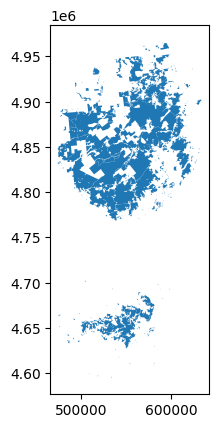

In [34]:
wild_lands.plot()

In [42]:
# View the first five entries in the "geometry" column
wild_lands.geometry.head(5)

0    POLYGON ((486093.245 4635308.586, 486787.235 4...
1    POLYGON ((491931.514 4637416.256, 491305.424 4...
2    POLYGON ((486000.287 4635834.453, 485007.55 46...
3    POLYGON ((541716.775 4675243.268, 541217.58 46...
4    POLYGON ((583896.043 4909643.187, 583891.2 490...
Name: geometry, dtype: geometry

In [78]:
# dataset contains 2983 different Polygon objects
# we create three more GeoDataFrames, containing campsite locations (Point), foot trails (LineString), and county boundaries (Polygon).

# Campsites in New York state (Point)
POI_data = gpd.read_file("Data/DEC_pointsinterest/DEC_pointsinterest/Decptsofinterest.shp")
campsites = POI_data.loc[POI_data.ASSET=='PRIMITIVE CAMPSITE'].copy()

# Foot trails in New York state (LineString)
roads_trails = gpd.read_file("Data/DEC_roadstrails/DEC_roadstrails/Decroadstrails.shp")
trails = roads_trails.loc[roads_trails.ASSET=='FOOT TRAIL'].copy()

# County boundaries in New York state (Polygon)
counties = gpd.read_file("Data/NY_county_boundaries/NY_county_boundaries/NY_county_boundaries.shp")

<Axes: >

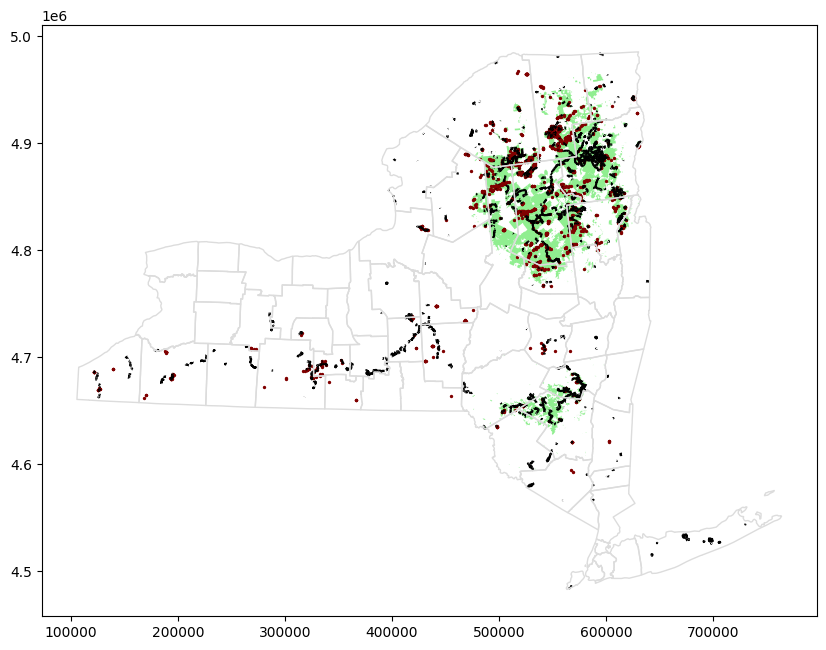

In [82]:
# Define a base map with county boundaries
ax = counties.plot(figsize=(10,10), color='none', edgecolor='gainsboro', zorder=3)

# Add wild lands, campsites, and foot trails to the base map
wild_lands.plot(color='lightgreen', ax=ax)
campsites.plot(color='maroon', markersize=2, ax=ax)
trails.plot(color='black', markersize=1, ax=ax)


In [ ]:
# CONCLUSION: It looks like the northeastern part of the state would be a great option for a camping trip!